In [1]:
import json
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

# Data

In [2]:
with open("./saturation/users.json", "r") as f:
    user_ids = json.load(f)
print(user_ids)

[3501, 70691, 122780, 69353, 74069, 29330, 83325, 42971, 100206, 64094, 14549, 8512, 110161, 8388, 54160, 15961]


In [3]:
ratings = pd.read_csv('../../data/rating.csv').rename(columns={"userId": 'u_id',  "movieId": "i_id"})
movies = pd.read_csv('../../data/movie.csv').rename(columns={"movieId": "i_id"})
genres = pd.DataFrame({k: {g: True for g in v} for k, v in movies.set_index('i_id').genres.apply(lambda gs: gs.split("|")).to_dict().items()}).fillna(False).transpose()

In [4]:
# ratings.head()

In [5]:
# movies.head()

In [6]:
# genres.head()

# Analysie selected users

In [7]:
GENRE1 = "Action"
GENRE2 = "Romance"

In [8]:
rat_sel = ratings[ratings.u_id.isin(user_ids)]
# rat_sel

Number of ratings posted:

In [9]:
# rat_sel.groupby('u_id').count().i_id

User genre interests:

In [10]:
user_genres = pd.merge(rat_sel, genres.reset_index().rename(columns={'index': 'i_id'}), on='i_id', how='left').groupby('u_id').sum().drop(['rating', 'i_id'], axis=1)

In [11]:
# (user_genres.transpose() / user_genres.transpose().sum() * 100).transpose().round(1)

Initial saturation:

In [12]:
# (user_genres.transpose() / user_genres.transpose().sum() * 100).round(1).transpose()[[GENRE1, GENRE2]]

In [13]:
genres_id = genres.reset_index().rename(columns={'index': 'i_id'})

# Saturation

In [14]:
with open('./saturation/all_saturation.json', 'r') as f:
    all_saturation = json.load(f)

In [15]:
satur_files = os.listdir('./saturation')

In [16]:
satur_data = {}

for sf in satur_files:
    if re.match("predictions", sf):
        data_tmp = pd.read_parquet(f'./saturation/{sf}')
        index_tmp = int(sf.split("_")[-1].split(".")[0])
        satur_data[index_tmp] = data_tmp #  pd.merge(data_tmp, genres_id, how='left', on='i_id')

Example from saved data frames:

In [17]:
# data_tmp

Number of records in saved data frames (of ratings for selected users and available movies)

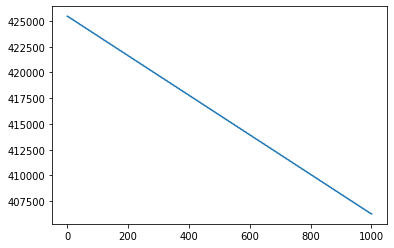

In [18]:
plt.plot(pd.Series(collections.OrderedDict(sorted({k: v.shape[0] for k, v in satur_data.items()}.items()))))
plt.show()

## Saturation 1

Saturation in 100 best new recommendations

In [19]:
# satur1 = {}
# for k, v in satur_data.items():
#     satur1[k] = v.groupby("u_id").apply(
#         lambda df: df.sort_values("pred")[-100:].drop(["u_id", "i_id", "pred"], axis=1).mean())
# satur1df = pd.concat(satur1)

In [20]:
# satur1df.sort_index()

In [21]:
# satur1df.sort_index()[[GENRE1, GENRE2]].reset_index().groupby('level_0').mean().plot(y=[GENRE1, GENRE2])
# plt.show()

In [22]:
# satur1df.sort_index()[[GENRE1, GENRE2]].reset_index(level=1).groupby('u_id').apply(lambda df:  df.loc[df.index  % 10  != 0, :].plot(y=[GENRE1, GENRE2]))
# plt.show()

In [23]:
# satur1df.sort_index()[[GENRE1, GENRE2]].rolling(50, center=True, min_periods=1).mean().reset_index(level=1).groupby('u_id').plot(y=[GENRE1, GENRE2])
# plt.show()

In [24]:
# satur2 = {}
# for k, v in satur_data.items():
#     satur2[k] = v.groupby("u_id").apply(
#         lambda df: df.sort_values("pred")[-1000:].drop(["u_id", "i_id", "pred"], axis=1).mean())
# satur2df = pd.concat(satur2)
# satur2df.sort_index()
#
# satur2df.sort_index()[[GENRE1, GENRE2]].reset_index().groupby('level_0').mean().plot(y=[GENRE1, GENRE2])
# plt.show()
# satur2df.sort_index()[[GENRE1, GENRE2]].rolling(50, center=True, min_periods=1).mean().reset_index(level=1).groupby(
#     'u_id').plot(y=[GENRE1, GENRE2])


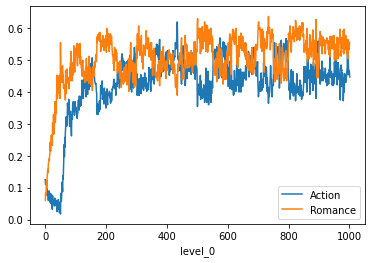

u_id
3501      AxesSubplot(0.125,0.125;0.775x0.755)
8388      AxesSubplot(0.125,0.125;0.775x0.755)
8512      AxesSubplot(0.125,0.125;0.775x0.755)
14549     AxesSubplot(0.125,0.125;0.775x0.755)
15961     AxesSubplot(0.125,0.125;0.775x0.755)
29330     AxesSubplot(0.125,0.125;0.775x0.755)
42971     AxesSubplot(0.125,0.125;0.775x0.755)
54160     AxesSubplot(0.125,0.125;0.775x0.755)
64094     AxesSubplot(0.125,0.125;0.775x0.755)
69353     AxesSubplot(0.125,0.125;0.775x0.755)
70691     AxesSubplot(0.125,0.125;0.775x0.755)
74069     AxesSubplot(0.125,0.125;0.775x0.755)
83325     AxesSubplot(0.125,0.125;0.775x0.755)
100206    AxesSubplot(0.125,0.125;0.775x0.755)
110161    AxesSubplot(0.125,0.125;0.775x0.755)
122780    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

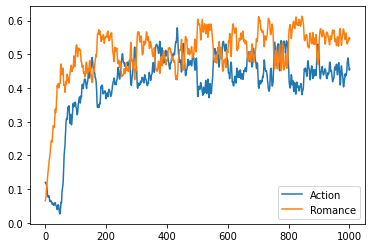

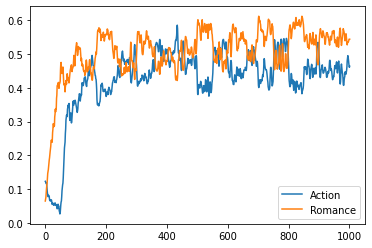

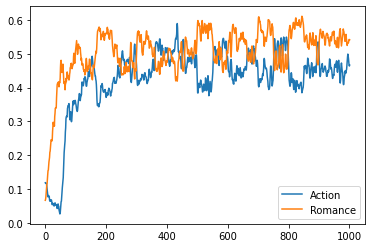

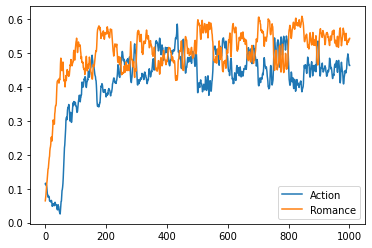

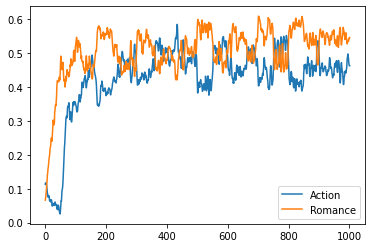

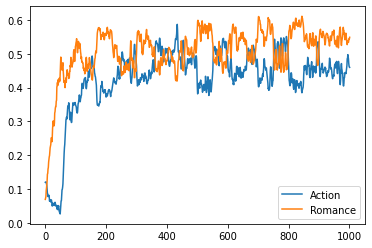

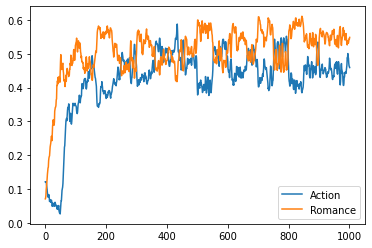

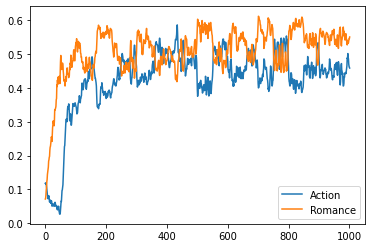

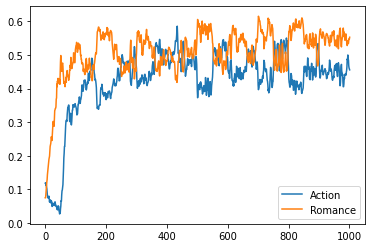

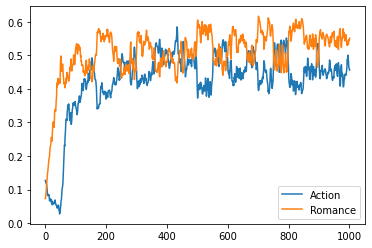

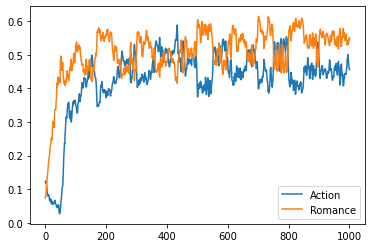

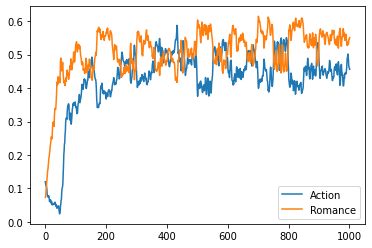

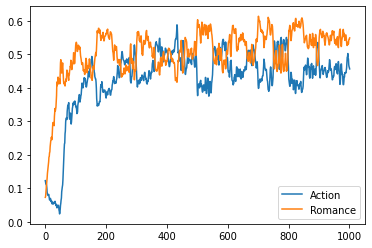

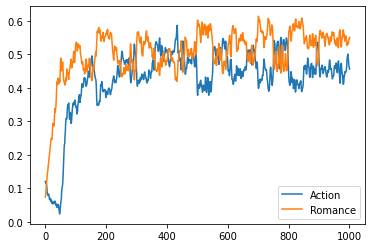

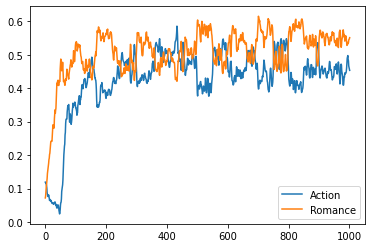

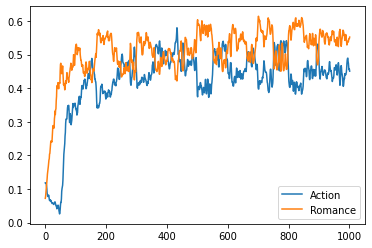

In [25]:
satur2 = {}
for k, v in satur_data.items():
    satur2[k] = v.groupby("u_id").apply(
        lambda df: df.sort_values("pred")[-50:].drop(["u_id", "i_id", "pred"], axis=1).mean())
satur2df = pd.concat(satur2)
satur2df.sort_index()

satur2df.sort_index()[[GENRE1, GENRE2]].reset_index().groupby('level_0').mean().plot(y=[GENRE1, GENRE2])
plt.show()

satur2df.sort_index()[[GENRE1, GENRE2]].rolling(50, center=True, min_periods=1).mean().reset_index(level=1).groupby(
    'u_id').plot(y=[GENRE1, GENRE2])


In [26]:
data = satur2df.sort_index()[[GENRE1, GENRE2]].reset_index(level=1).groupby('u_id').apply(lambda df: df.rolling(50, center=True, min_periods=1).mean().drop('u_id', axis=1).values).values.tolist()
Y_true = np.concatenate(data)
print(Y_true.shape)
lengths = np.array([d.shape[0] for d in data])
print(lengths)

(16032, 2)
[1002 1002 1002 1002 1002 1002 1002 1002 1002 1002 1002 1002 1002 1002
 1002 1002]


In [27]:
from models_gaussian_2d import *  # TODO: save data, comment out
import time
from eval_utils import *

2022-10-03 09:45:46.614677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-03 09:45:46.614747: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
n = [2, 3, 4, 8]
l = [2, 2, 3, 3]
lr = [0.01, 0.05, 0.10, 0.20]
ITER = 50000
TOLERANCE = 1e-4



## Model n=2, l=2, lr=0.01

         1      -30314.3490             +nan
         2      -30239.6497         +74.6993
         3      -30157.3960         +82.2536
         4      -30067.2652         +90.1309
         5      -29968.8896         +98.3755
         6      -29861.8514        +107.0382
         7      -29745.6749        +116.1765
         8      -29619.8180        +125.8569
         9      -29483.6615        +136.1564
        10      -29336.4965        +147.1650
        11      -29177.5076        +158.9889
        12      -29005.7533        +171.7542
        13      -28820.1409        +185.6125
        14      -28619.3937        +200.7472
        15      -28402.0103        +217.3834
        16      -28166.2099        +235.8003
        17      -27909.8612        +256.3488
        18      -27630.3847        +279.4765
        19      -27324.6203        +305.7644
        20      -26988.6394        +335.9809
        21      -26617.4740        +371.1654
        22      -26204.7135        +412.7605
        23

DONE in: 114.50723564531654


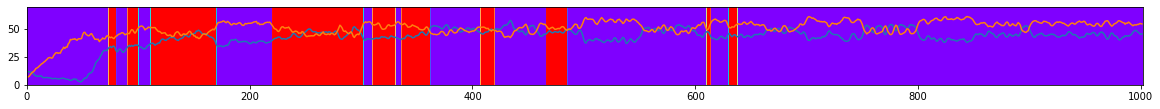

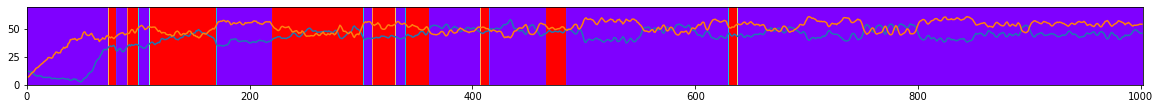

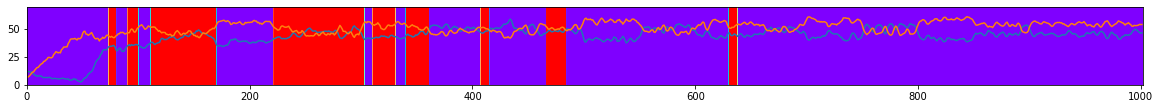

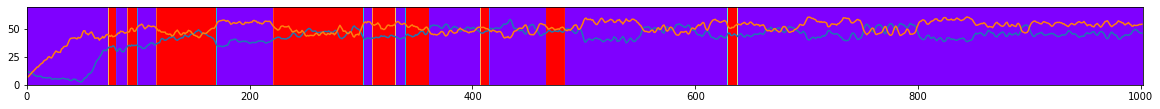

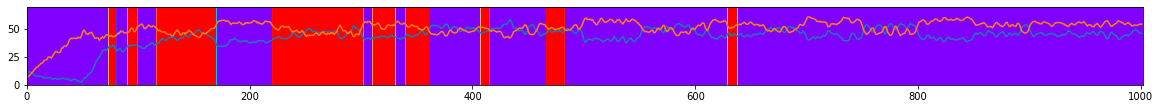

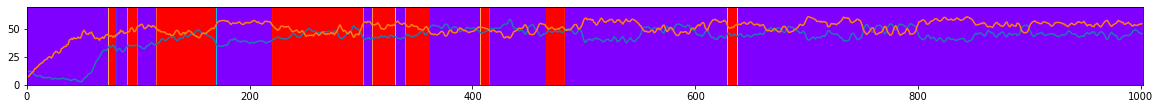

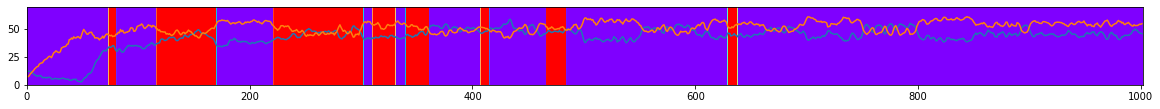

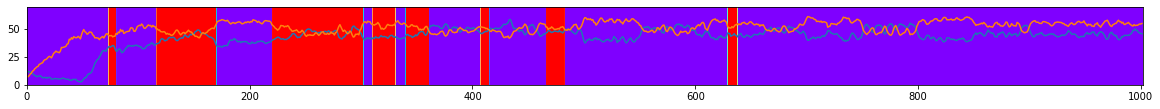

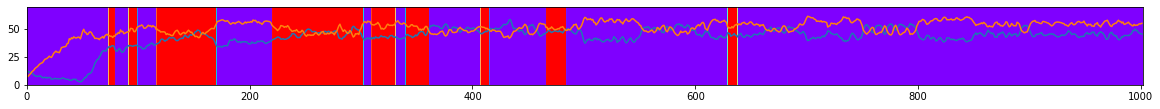

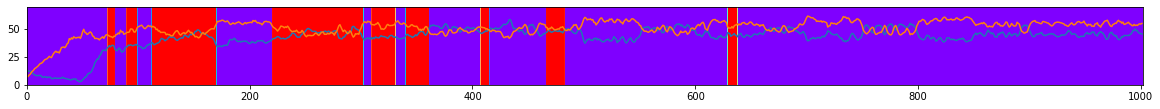

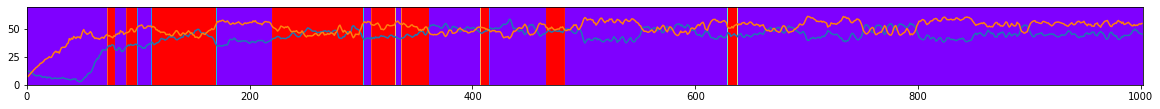

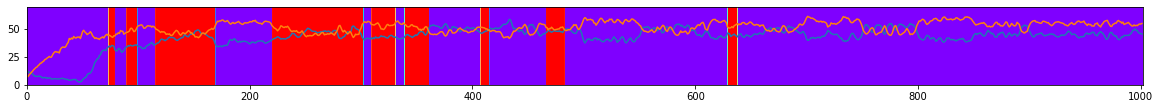

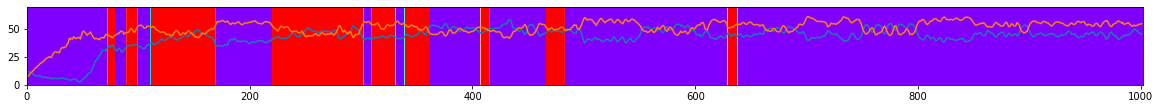

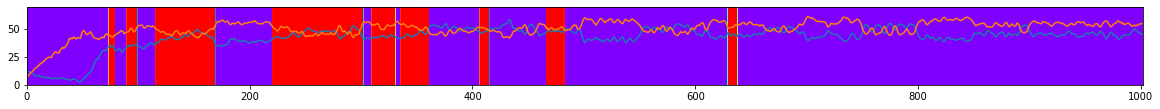

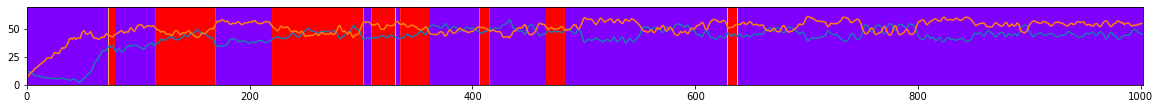

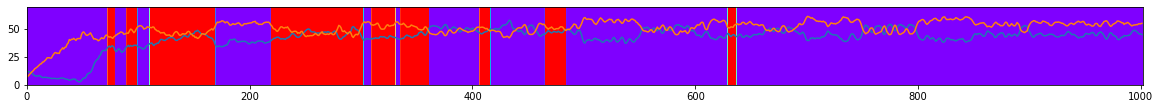

/tmp/ipykernel_1186654/930595878.py:71: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.imshow(states[:, (i * interval): ((i + 1) * interval)],


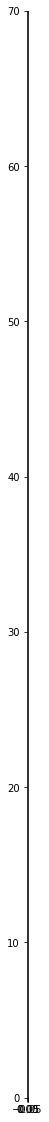



## Model n=3, l=2, lr=0.01

         1      -29990.6767             +nan
         2      -29983.2125          +7.4643
         3      -29975.1780          +8.0345
         4      -29966.5719          +8.6060
         5      -29957.3928          +9.1791
         6      -29947.6391          +9.7538
         7      -29937.3090         +10.3301
         8      -29926.4007         +10.9082
         9      -29914.9125         +11.4883
        10      -29902.8421         +12.0703
        11      -29890.1876         +12.6545
        12      -29876.9466         +13.2410
        13      -29863.1169         +13.8298
        14      -29848.6959         +14.4210
        15      -29833.6810         +15.0149
        16      -29818.0695         +15.6115
        17      -29801.8586         +16.2109
        18      -29785.0452         +16.8133
        19      -29767.6264         +17.4188
        20      -29749.5988         +18.0276
        21      -29730.9591         +18.6397
        22      -29711.7038         +19.2553
        23

DONE in: 114.91306712664664


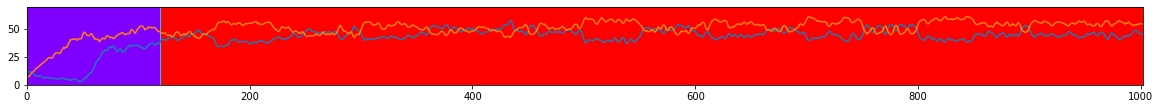

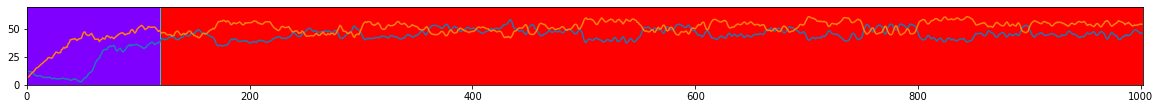

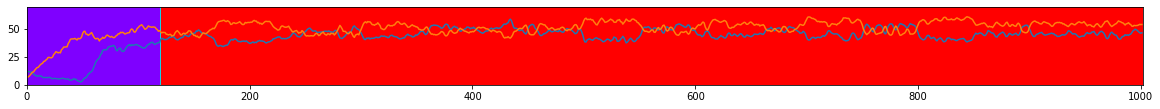

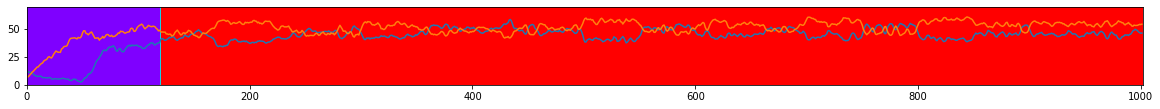

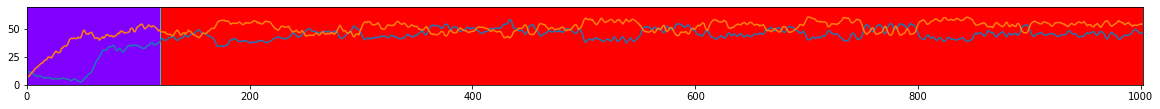

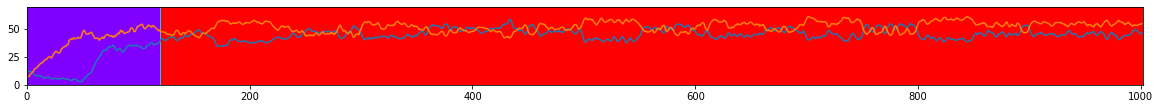

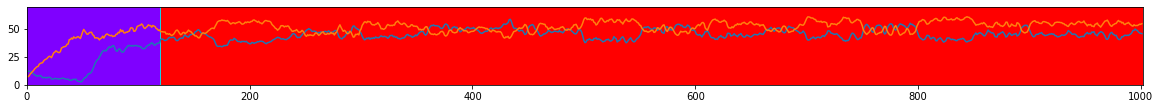

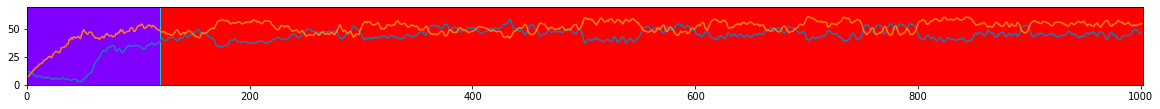

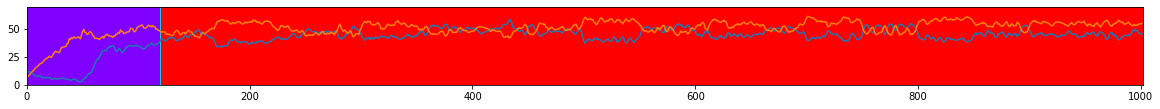

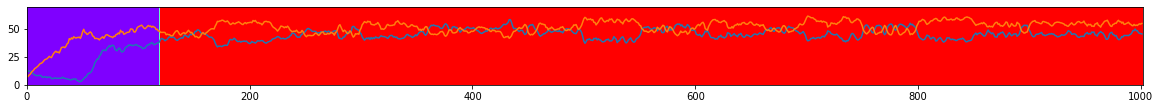

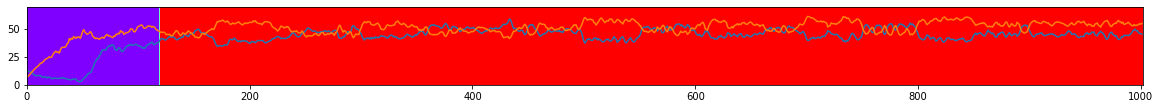

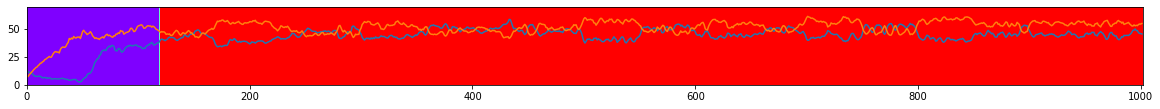

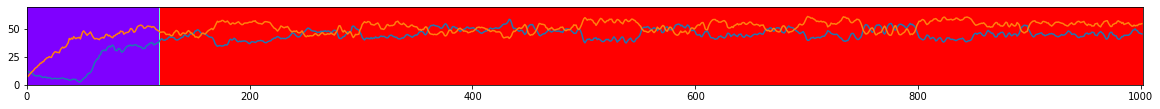

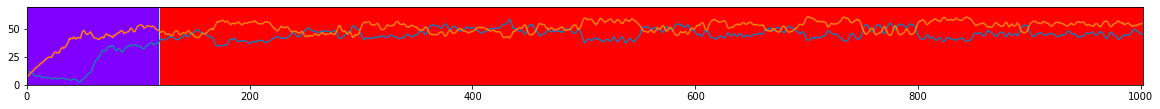

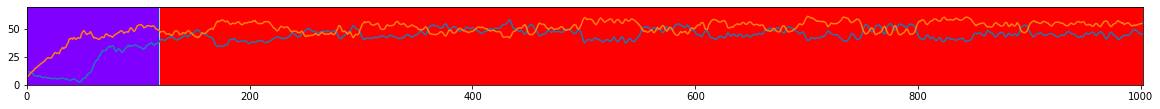

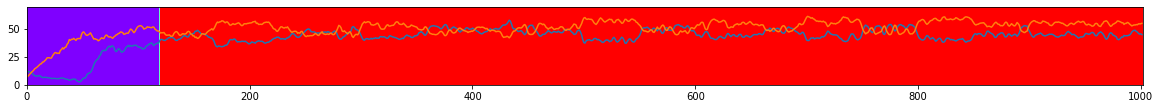

/tmp/ipykernel_1186654/930595878.py:71: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.imshow(states[:, (i * interval): ((i + 1) * interval)],


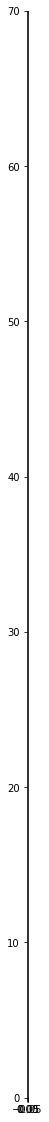



## Model n=4, l=3, lr=0.01

         1      -30243.4847             +nan
         2      -30239.1471          +4.3376
         3      -30234.5163          +4.6308
         4      -30229.5923          +4.9240
         5      -30224.3750          +5.2174
         6      -30218.8641          +5.5109
         7      -30213.0596          +5.8045
         8      -30206.9612          +6.0983
         9      -30200.5689          +6.3923
        10      -30193.8825          +6.6864
        11      -30186.9018          +6.9807
        12      -30179.6266          +7.2752
        13      -30172.0568          +7.5698
        14      -30164.1921          +7.8647
        15      -30156.0323          +8.1598
        16      -30147.5773          +8.4550
        17      -30138.8268          +8.7505
        18      -30129.7806          +9.0462
        19      -30120.4385          +9.3421
        20      -30110.8002          +9.6383
        21      -30100.8655          +9.9347
        22      -30090.6342         +10.2313
        23

DONE in: 122.49538928782567


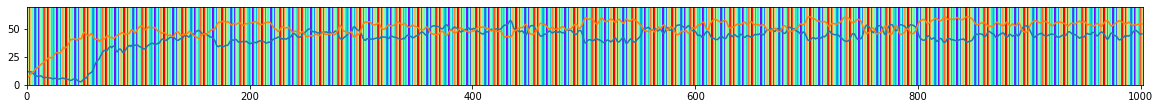

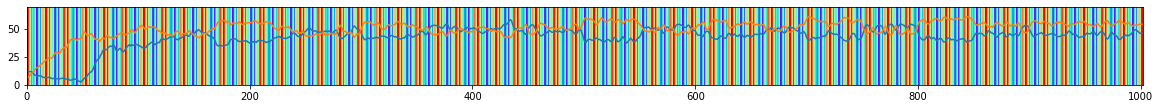

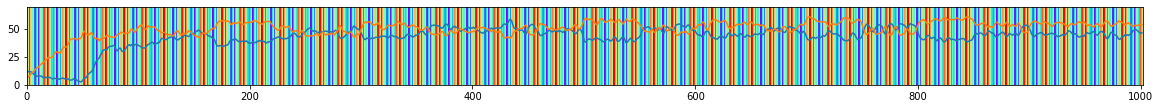

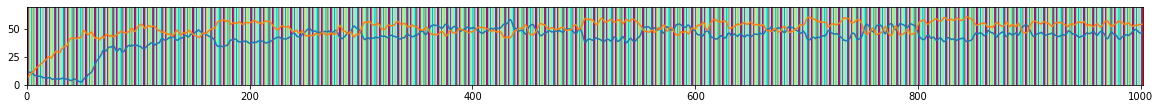

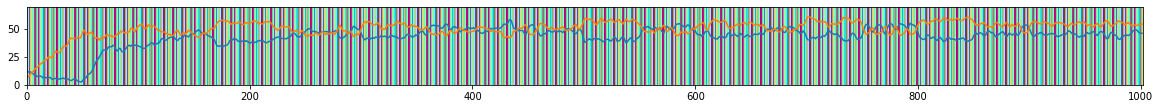

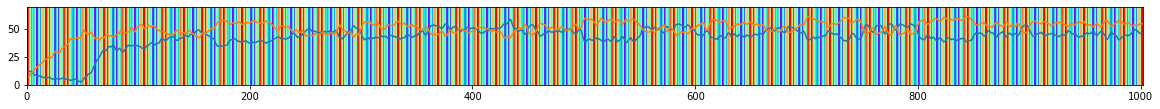

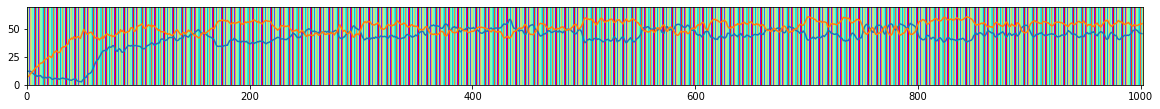

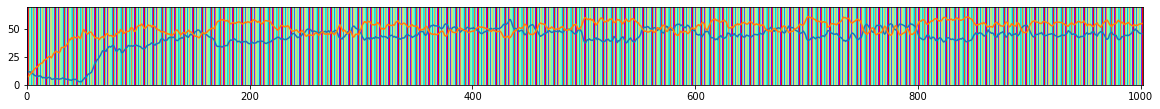

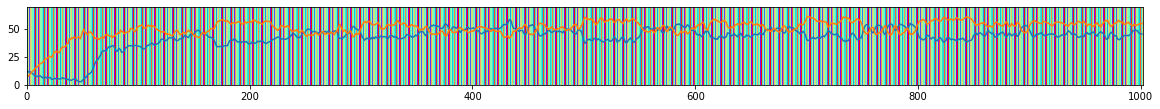

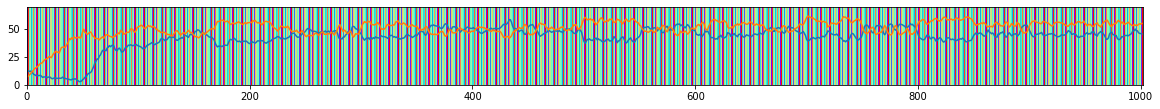

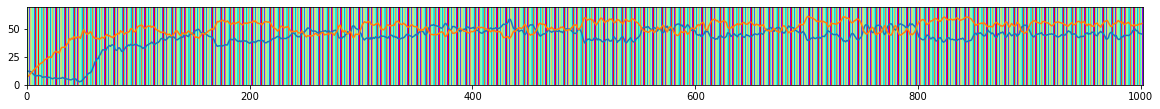

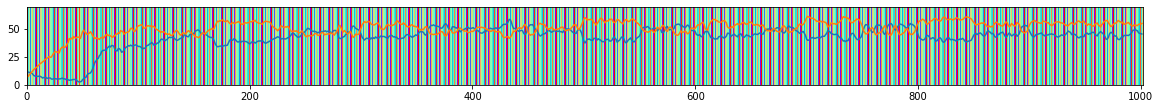

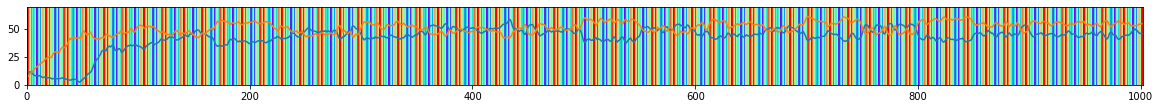

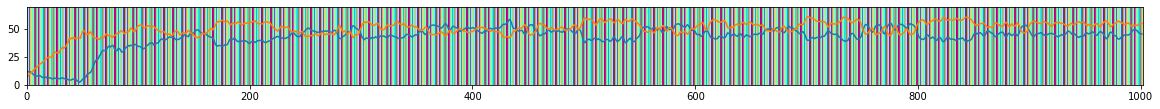

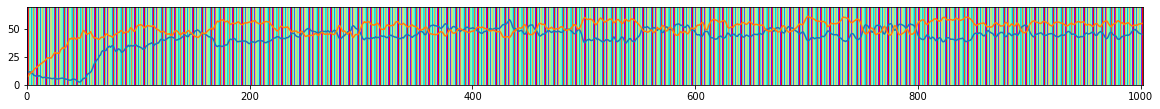

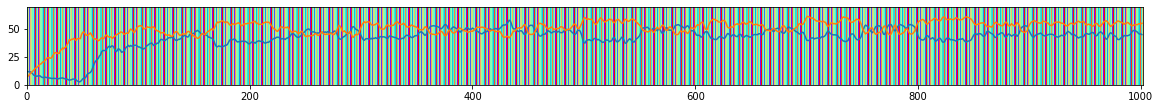

/tmp/ipykernel_1186654/930595878.py:71: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.imshow(states[:, (i * interval): ((i + 1) * interval)],


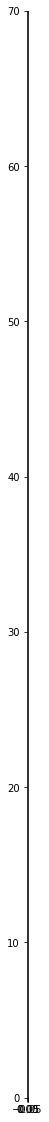



## Model n=8, l=3, lr=0.01

         1      -29868.0538             +nan
         2      -29863.5390          +4.5147
         3      -29858.8047          +4.7343
         4      -29853.8499          +4.9548
         5      -29848.6735          +5.1764
         6      -29843.2746          +5.3989
         7      -29837.6521          +5.6225
         8      -29831.8048          +5.8473
         9      -29825.7317          +6.0732
        10      -29819.4314          +6.3003
        11      -29812.9027          +6.5287
        12      -29806.1442          +6.7585
        13      -29799.1546          +6.9896
        14      -29791.9325          +7.2221
        15      -29784.4764          +7.4561
        16      -29776.7847          +7.6917
        17      -29768.8558          +7.9289
        18      -29760.6880          +8.1677
        19      -29752.2797          +8.4083
        20      -29743.6291          +8.6506
        21      -29734.7344          +8.8948
        22      -29725.5935          +9.1408
        23

DONE in: 128.47145986789837


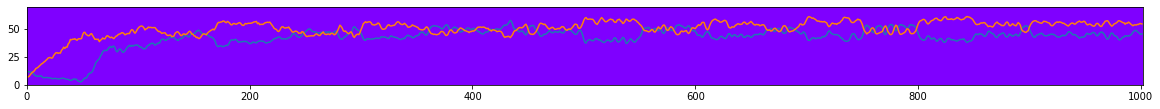

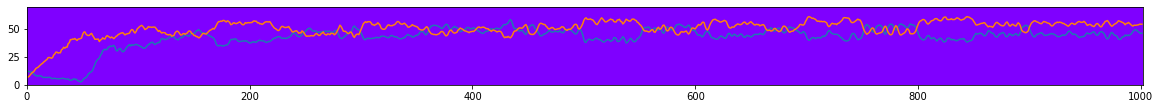

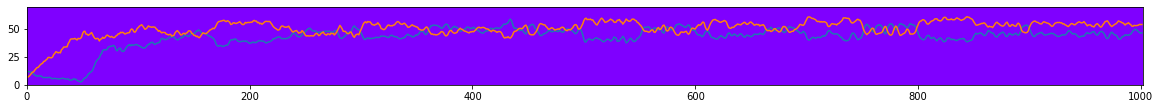

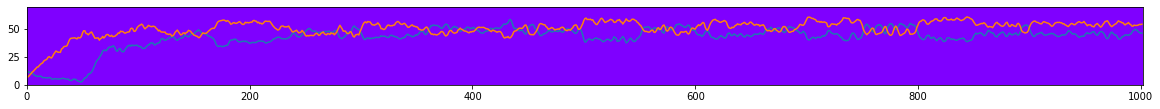

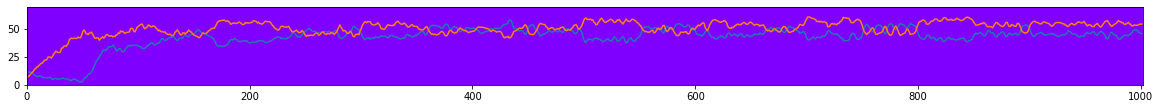

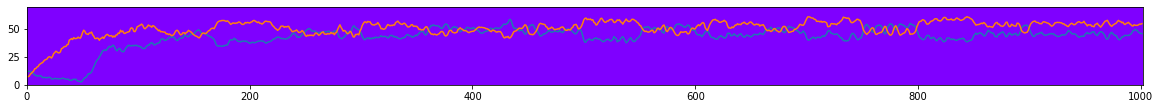

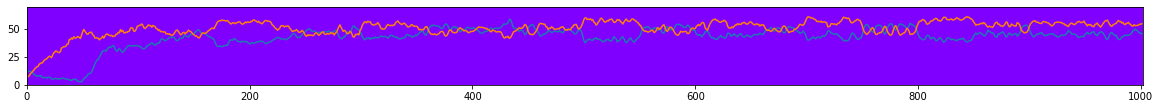

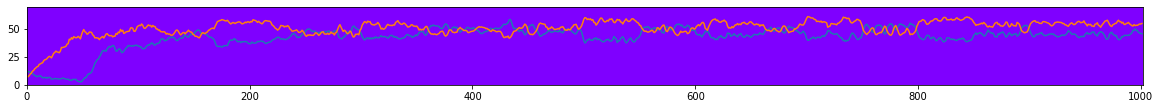

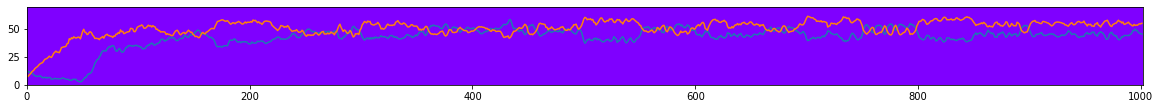

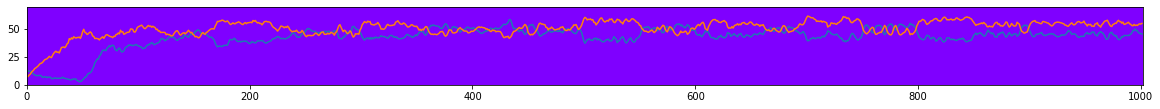

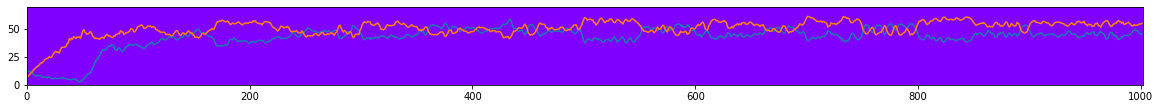

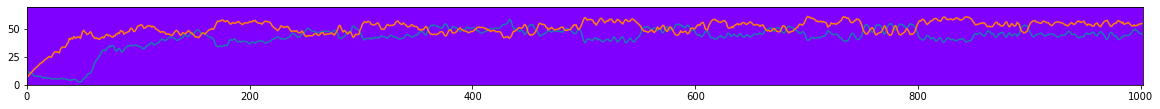

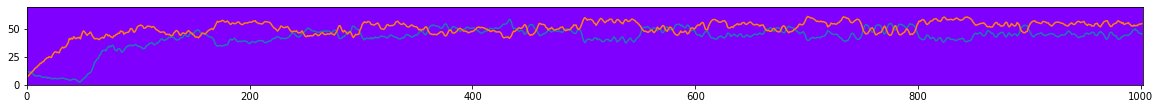

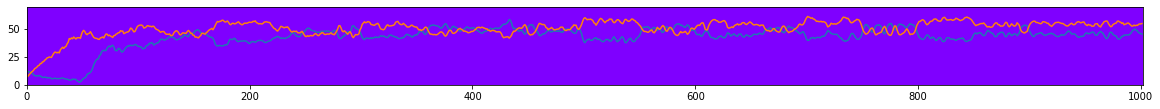

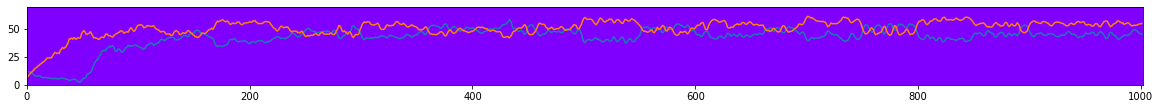

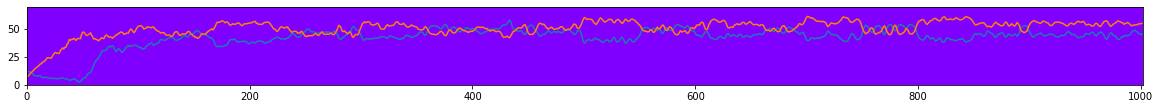

/tmp/ipykernel_1186654/930595878.py:71: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.imshow(states[:, (i * interval): ((i + 1) * interval)],


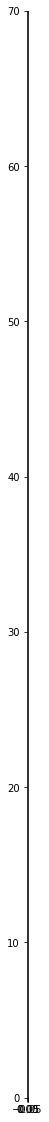



## Model n=2, l=2, lr=0.05

         1      -29839.5163             +nan
         2      -29278.0902        +561.4262
         3      -28585.0835        +693.0067
         4      -27706.6591        +878.4244
         5      -26544.2824       +1162.3766
         6      -24886.7226       +1657.5598
         7      -22129.3634       +2757.3592
         8      -14259.8290       +7869.5345
         9      -23900.7444       -9640.9155
        10      -26709.9822       -2809.2378
        11      -27658.6921        -948.7099
        12      -28080.3402        -421.6481
        13      -28282.9181        -202.5779
        14      -28382.0102         -99.0921
        15      -28430.0847         -48.0745
        16      -28452.8880         -22.8032
        17      -28463.3417         -10.4538
        18      -28467.8937          -4.5520
        19      -28469.6971          -1.8034
        20      -28470.2531          -0.5559
        21      -28470.2548          -0.0018
        22      -28470.0129          +0.2419
        23

DONE in: 112.63183930702507


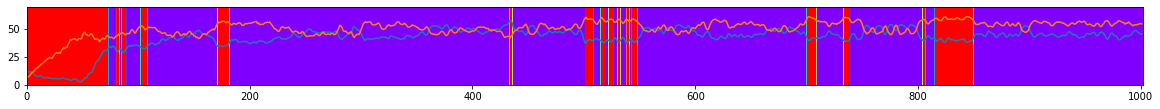

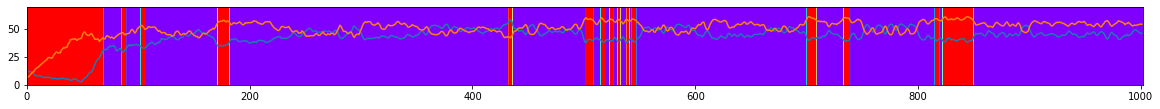

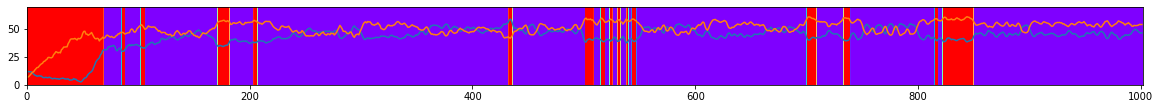

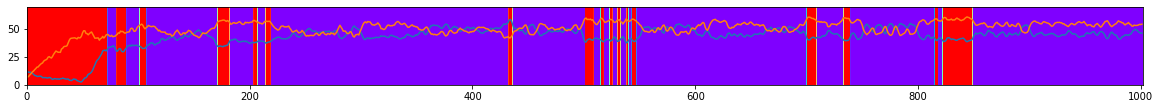

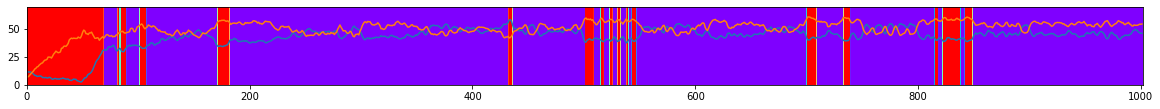

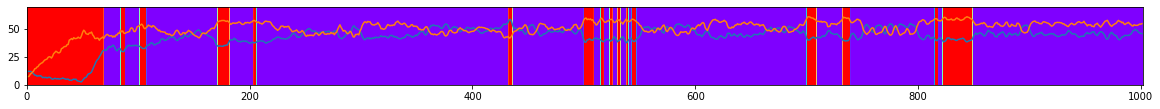

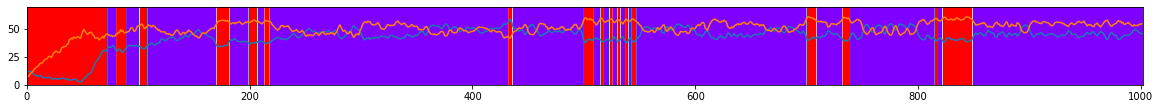

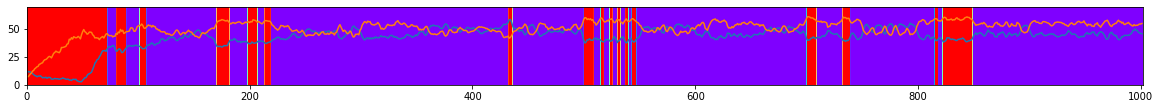

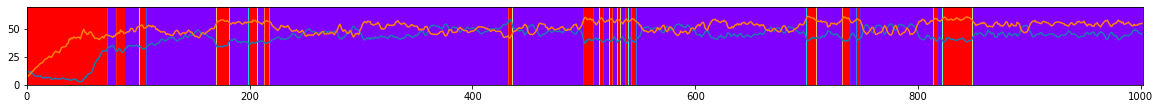

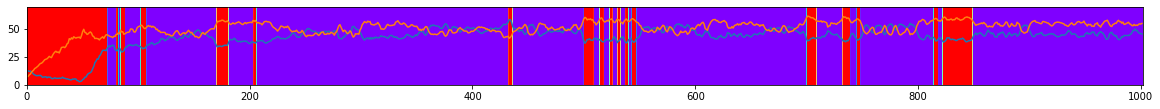

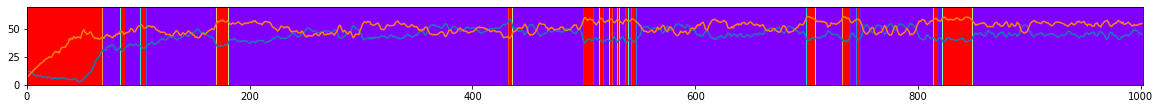

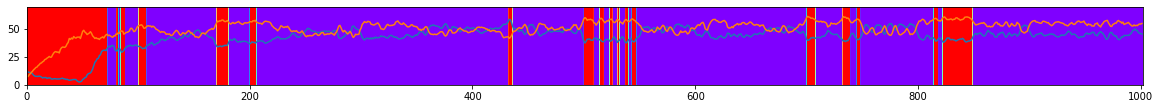

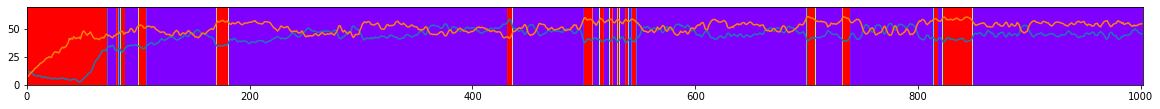

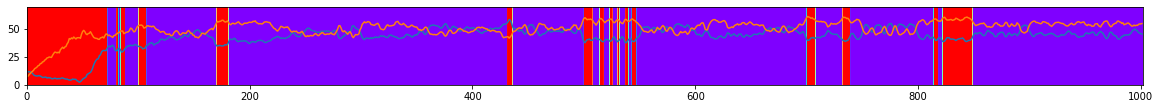

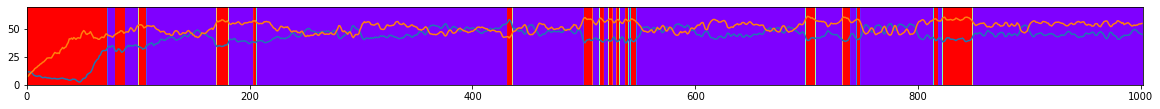

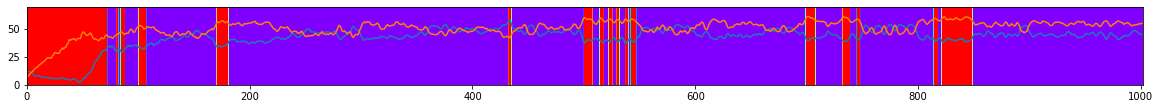

/tmp/ipykernel_1186654/930595878.py:71: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.imshow(states[:, (i * interval): ((i + 1) * interval)],


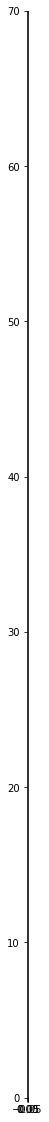



## Model n=3, l=2, lr=0.05

         1      -29991.5712             +nan
         2      -29959.5121         +32.0590
         3      -29924.8395         +34.6726


In [ ]:
from IPython.display import display, Markdown

t = time.localtime()
interval = 1002
true_values = None

wandb_params = {
    "init": {
        "project": "gaussian-dense-hmm-saturation",
        "entity": "cirglaboratory",  # cirglaboratory
        "save_code": True,
        "group": f"models-eval-2018",
        "job_type": f"{t.tm_year}-{t.tm_mon}-{t.tm_mday}",
        "name": f"test3",
        "reinit": True
    },
    "config": {
        "n": 0,
        "s": len(lengths),
        "T": lengths.max(),
        "model": None,
        "m": None,
        "l": 0,
        "lr": 0,
        "em_epochs": None,
        "em_iter": None,
        "cooc_epochs": ITER,
        "simple_model": None
    }
}

mstep_cofig = {"cooc_lr": 0, "cooc_epochs": ITER, "l_uz": 0,
               'loss_type': 'square', "scheduler": None}
# Model building
for eta in lr:
    for n_, l_ in zip(n, l):
        display(Markdown(f"\n\n## Model n={n_}, l={l_}, lr={eta}"))

        ITER = 50000 + n_ * 10000


        def em_scheduler(max_lr, it):
            if it <= np.ceil(2 * ITER / 3):
                return max_lr * np.cos((np.ceil(ITER * 2 / 3) - it / 2) / ITER * np.pi * .67)
            else:
                return max_lr * np.cos(3 * (np.ceil(ITER * 2 / 3) - it) * np.pi * .33 / ITER) ** 3


        # update configs
        wandb_params['config'].update({"lr": eta, "l": l_, "n": n_})
        mstep_cofig.update({"cooc_lr": eta, "l_uz": l_, "scheduler": em_scheduler})
        # train
        hmm_monitor = DenseHMMLoggingMonitor(tol=TOLERANCE, n_iter=0, verbose=True,
                                             wandb_log=True, wandb_params=wandb_params, true_vals=true_values,
                                             log_config={'metrics_after_convergence': True})
        densehmm = GaussianDenseHMM(n_, mstep_config=mstep_cofig,
                                    covariance_type='diag', opt_schemes={"cooc"},
                                    logging_monitor=hmm_monitor,
                                    init_params="stmc", params="stmc", early_stopping=True)

        start = time.perf_counter()
        densehmm.fit_coocs(Y_true, lengths)
        print(f"DONE in: {time.perf_counter() - start}")

        # provide predictions
        states = densehmm.predict(Y_true).reshape(1, -1)

        for i in range(Y_true.shape[0] // (interval) + 1):
            plt.figure(figsize=(20, 20))
            plt.plot(Y_true[(i * interval): ((i + 1) * interval)] * 100)
            plt.imshow(states[:, (i * interval): ((i + 1) * interval)],
                       extent=(0, Y_true[(i * interval): ((i + 1) * interval)].shape[0], 0, 70), cmap=cm.rainbow)
            plt.show()

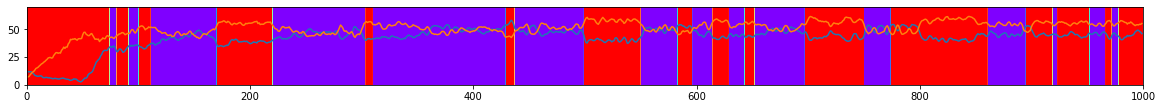

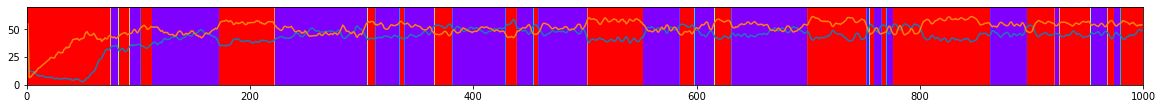

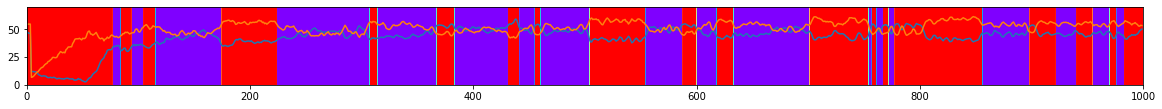

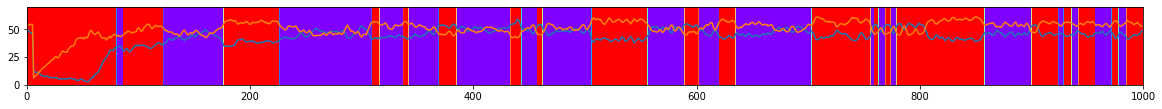

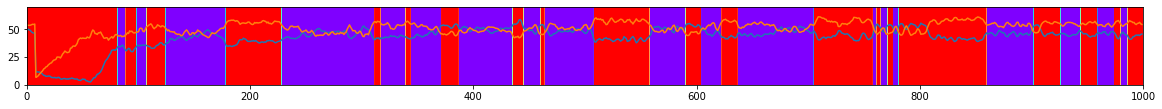

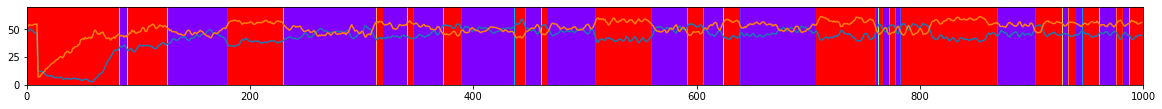

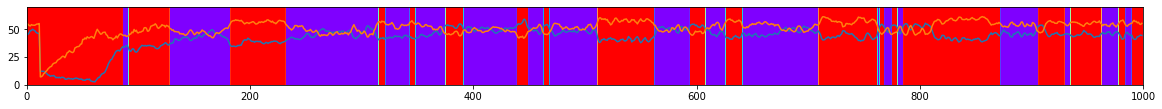

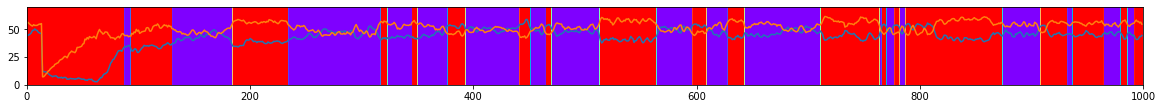

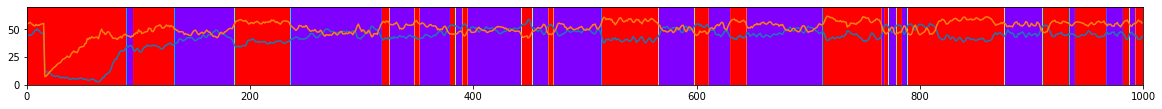

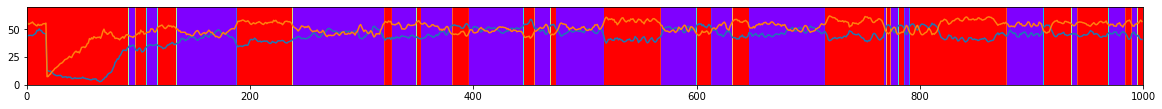

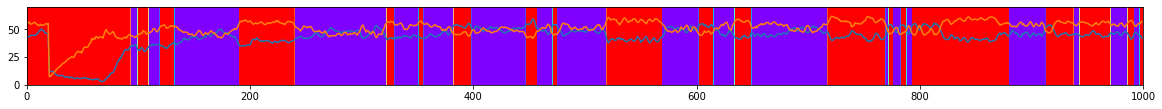

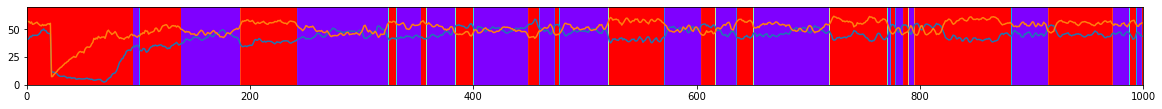

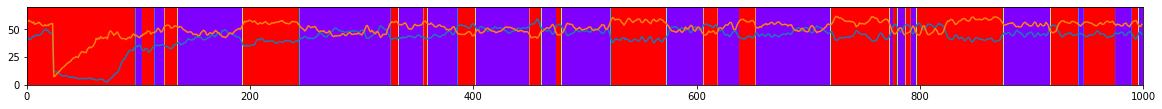

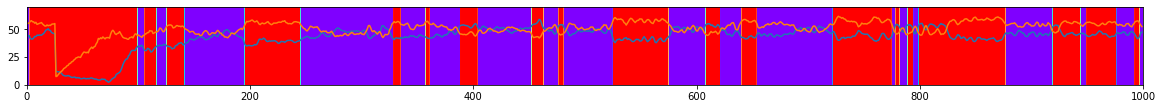

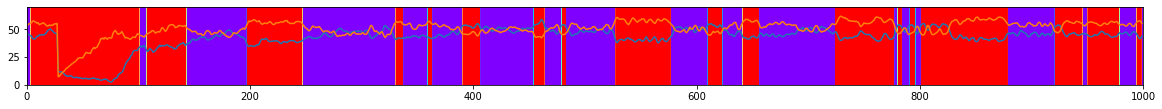

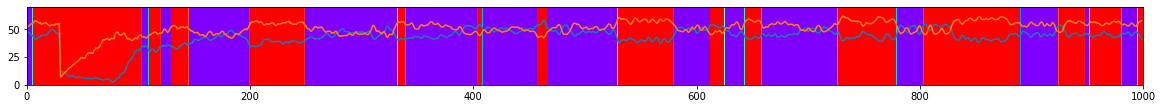

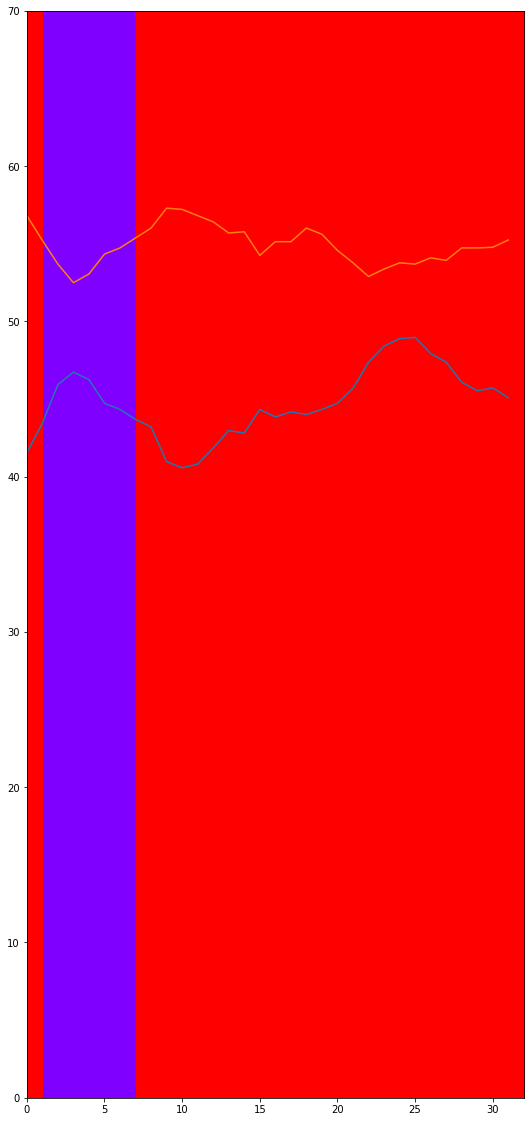

In [32]:
# for i in range(Y_true.shape[0] // (interval) + 1):
#     plt.figure(figsize=(20, 20))
#     plt.plot(Y_true[(i * interval): ((i + 1) * interval)] * 100)
#     plt.imshow(states[:, (i * interval): ((i + 1) * interval)],
#                extent=(0, Y_true[(i * interval): ((i + 1) * interval)].shape[0], 0, 70), cmap=cm.rainbow)
#     plt.show()

# Analyse mean ratings of reccomended movies

In [ ]:
# def saturation3(df):
#     df_selected = df.sort_values("pred")[-100:]
#     # selected = [df_selected.groupby(g)['pred'].mean() for g in [GENRE1, GENRE2]]
#     selected = [df_selected.groupby(g)['pred'].mean() for g in ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']]
#     return [s[True] if True in s.keys() else 0 for s in selected]

In [ ]:
# satur3 = {}
# for k, v in satur_data.items():
#     # satur3[k] = pd.DataFrame(v.groupby("u_id").apply( saturation3).to_dict(), index = [GENRE1, GENRE2])
#     satur3[k] = pd.DataFrame(v.groupby("u_id").apply( saturation3).to_dict(), index = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir'])

In [ ]:
# satur3df = pd.concat(satur3)
# satur3dff =satur3df.reset_index(level=0).groupby('level_0').apply(lambda df: df.transpose())

In [ ]:
# satur3dff.sort_index()[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']].reset_index().groupby('level_1').mean().plot(y=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir'])
#

In [ ]:
# satur3dff.sort_index()[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']].reset_index(level=1).groupby('level_1').apply(
#     lambda df: df.replace(0, np.nan).plot(y=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']))
# plt.show()

In [ ]:
# satur3dff.sort_index()[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
#        'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
#        'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']].reset_index(level=1).groupby('level_1').apply(
#     lambda df: df.replace(0, np.nan).plot(y=[GENRE1, GENRE2]))
# plt.show()